In [1]:
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Position_CSV/WR_dat.csv')
df.head()

,Unnamed: 0,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,1,Jared Abbrederis,1,21,0.761905,Career,27.0,1.0,1.0,0.0,...,26.0,NaN,190.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,Davante Adams,46,86,8.558140,Career,NaN,0.0,NaN,0.0,...,38.0,NaN,212.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,Nelson Agholor,22,71,4.957746,Career,NaN,2.0,NaN,0.0,...,24.0,NaN,190.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4,Kamar Aiken,12,71,2.704225,Career,NaN,0.0,NaN,NaN,...,17.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5,Sam Aiken,7,95,1.178947,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Career


In [3]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [4]:
df.fillna(0, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['kickoff_return_touchdowns', 'other_touchdowns', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rushing_and_receiving_touchdowns', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -1.9523563795135888
Weights:  [-1.36515191e-01 -4.35554370e-14  2.38771412e-01  3.76405776e-02
  1.42282113e-01 -8.61822081e+00  2.71979841e-01 -3.95934128e+00
 -2.34738960e+00  4.42463473e+00 -1.53608019e-01  4.79644345e-01
 -8.26650294e-02  6.20298089e+00]


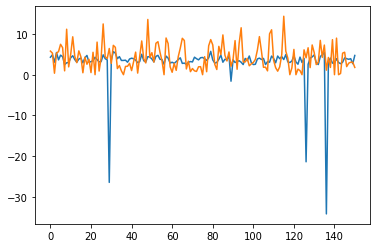

In [6]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['total_touchdowns', 'points', 'total_touchdowns']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.06637504666815353
Weights:  [ 1.16238489 -0.37446206  1.16238489]


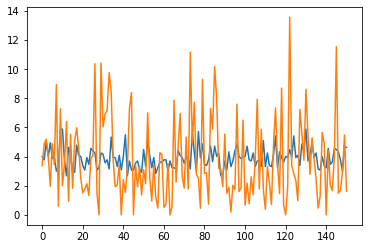

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  0.06851990680126685
Weights:  [ 0.64565011 -0.20218256  0.64565011]


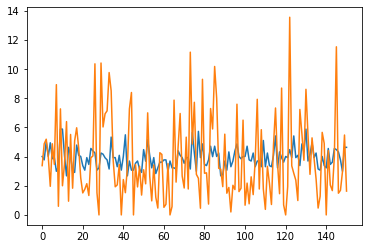

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [10]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
0.060492373862630275
[ 0.17726907 -0.04568638  0.17726907]

Ridge Regression
0.061595109280815616
[ 0.11264008 -0.02413202  0.11264008]
